<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/ITERATION_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function

In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.3 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-f8tzzhxr
  Entered build tracker: /tmp/pip-build-tracker-f8tzzhxr
  Created temporary directory: /tmp/pip-install-goyggx0r
  Created temporary directory: /tmp/pip-ephem-wheel-cache-7y004dow
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.org/simple/setuptools/
  Getting page https://pypi.org/simple/setuptools/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/setuptools/" in the cache
  Request header has "max_age" as 0, cache bypassed
  No cache entry available
  Start

In [2]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [3]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt
import time

In [4]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [5]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [6]:
!pip install pyswarms
import numpy as np
import pyswarms as ps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 5.0 MB/s eta 0:00:00


In [24]:
method =' Quasi-Random Sequence'
prompt = f"generate precisely 100 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [25]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

Llama.generate: prefix-match hit


In [26]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-8.34, -7.65, -6.92, -6.17, -5.41, -4.64, -3.87, -3.09, -2.22, -1.35, -0.48, 0.42, 0.95, 1.48, 2.02, 2.55, 3.08, 3.61, 4.14, 4.67, 5.2, 5.73, 6.26, 6.79, 7.32]


In [79]:
import numpy as np
import re

def run_pso(
    CostFunction, nVar=10, VarMin=-10, VarMax=10, MaxIt=20, nPop=500,
    w=1, wdamp=0.99, c1=2.05, c2=2.05, n_threads=2, n_batch=512, n_gpu_layers=32, chi=0.729843788
):

    VarSize = (nVar,)
    VelMax = 0.1 * (VarMax - VarMin)
    VelMin = -VelMax


    particles = []
    nSize = np.size(Quasi_Random_Sequence_Initialisation)
    for i in range(nSize):
        position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })
    for _ in range(nPop - nSize):
        position = np.random.uniform(VarMin, VarMax, VarSize)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })

    print(np.size(particles))

    GlobalBest = {'Position': None, 'Cost': np.inf}

    for p in particles:
        if p['Cost'] < GlobalBest['Cost']:
            GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    BestCost = np.zeros(MaxIt)
    w_values = []
    g_values = []

    for it in range(MaxIt):
        for p in particles:
            # Update Velocity
            r1 = np.random.rand(*VarSize)
            r2 = np.random.rand(*VarSize)
            p['Velocity'] = chi * (
                p['Velocity']
                + c1 * r1 * (p['Best']['Position'] - p['Position'])
                + c2 * r2 * (GlobalBest['Position'] - p['Position'])
            )

            # Apply Velocity Limits
            p['Velocity'] = np.maximum(p['Velocity'], VelMin)
            p['Velocity'] = np.minimum(p['Velocity'], VelMax)

            # Update Position
            p['Position'] += p['Velocity']

            # Velocity Mirror Effect
            IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
            p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

            # Apply Position Limits
            p['Position'] = np.maximum(p['Position'], VarMin)
            p['Position'] = np.minimum(p['Position'], VarMax)

            # Evaluation
            p['Cost'] = CostFunction(p['Position'])

            # Update Personal Best
            if p['Cost'] < p['Best']['Cost']:
                p['Best']['Position'] = p['Position'].copy()
                p['Best']['Cost'] = p['Cost']

                # Update Global Best
                if p['Best']['Cost'] < GlobalBest['Cost']:
                    GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}


        BestCost[it] = GlobalBest['Cost']

        print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")
        g_values.append(GlobalBest['Cost'])
        w *= wdamp

        w_values.append(w)
        g_values.append(GlobalBest['Cost'])

    w_values.append(w)
    print("Final Weights:", w_values)
    return BestCost, w_values, g_values

In [80]:
# def sphere(x):
#     return sum(x**2)

In [81]:
# BestCost, w_values, g_values = run_pso(CostFunction=sphere)

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

# GNBG class definition
class GNBG:
    def __init__(self, MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition):
        self.MaxEvals = MaxEvals
        self.AcceptanceThreshold = AcceptanceThreshold
        self.Dimension = Dimension
        self.CompNum = CompNum
        self.MinCoordinate = MinCoordinate
        self.MaxCoordinate = MaxCoordinate
        self.CompMinPos = CompMinPos
        self.CompSigma = CompSigma
        self.CompH = CompH
        self.Mu = Mu
        self.Omega = Omega
        self.Lambda = Lambda
        self.RotationMatrix = RotationMatrix
        self.OptimumValue = OptimumValue
        self.OptimumPosition = OptimumPosition
        self.FEhistory = []
        self.FE = 0
        self.BestFoundPosition = None
        self.AcceptanceReachPoint = np.inf
        self.BestFoundResult = np.inf


    def fitness(self, X):
        if len(X.shape)<2:
            X = X.reshape(1,-1)
        SolutionNumber = X.shape[0]
        result = np.nan * np.ones(SolutionNumber)
        for jj in range(SolutionNumber):
            x = X[jj, :].reshape(-1, 1)  # Ensure column vector
            f = np.nan * np.ones(self.CompNum)
            for k in range(self.CompNum):
                if len(self.RotationMatrix.shape) == 3:
                    rotation_matrix = self.RotationMatrix[:, :, k]
                else:
                    rotation_matrix = self.RotationMatrix

                a = self.transform((x - self.CompMinPos[k, :].reshape(-1, 1)).T @ rotation_matrix.T, self.Mu[k, :], self.Omega[k, :])
                b = self.transform(rotation_matrix @ (x - self.CompMinPos[k, :].reshape(-1, 1)), self.Mu[k, :], self.Omega[k, :])
                f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]

            result[jj] = np.min(f)
            if self.FE > (self.MaxEvals-1):
                return result
            self.FE += 1
            self.FEhistory = np.append(self.FEhistory, result[jj])
            if self.BestFoundResult > result[jj]:
                self.BestFoundResult = result[jj]
            if abs(self.FEhistory[self.FE-1] - self.OptimumValue) < self.AcceptanceThreshold and np.isinf(self.AcceptanceReachPoint):
                self.AcceptanceReachPoint = self.FE
        return result
    def transform(self, X, Alpha, Beta):
        Y = X.copy()
        tmp = (X > 0)
        Y[tmp] = np.log(X[tmp])
        Y[tmp] = np.exp(Y[tmp] + Alpha[0] * (np.sin(Beta[0] * Y[tmp]) + np.sin(Beta[1] * Y[tmp])))
        tmp = (X < 0)
        Y[tmp] = np.log(-X[tmp])
        Y[tmp] = -np.exp(Y[tmp] + Alpha[1] * (np.sin(Beta[2] * Y[tmp]) + np.sin(Beta[3] * Y[tmp])))
        return Y

In [83]:
# ProblemIndex = 22  # Choose a problem instance from 1 to 24
# folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat

# # Load GNBG data for the selected problem instance
# if 1 <= ProblemIndex <= 24:
#     filename = f'f{ProblemIndex}.mat'
#     GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']
#     MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
#     AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
#     Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
#     CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
#     MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
#     MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
#     CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
#     CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
#     CompH = np.array(GNBG_tmp['Component_H'][0, 0])
#     Mu = np.array(GNBG_tmp['Mu'][0, 0])
#     Omega = np.array(GNBG_tmp['Omega'][0, 0])
#     Lambda = np.array(GNBG_tmp['lambda'][0, 0])
#     RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
#     OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
#     OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])
# else:
#     raise ValueError('ProblemIndex must be between 1 and 24.')

# # Initialize GNBG problem instance
# gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)
# popsize = 500000
# print(MaxEvals // popsize)

In [84]:
# nVar = Dimension
# VarMin = MinCoordinate
# VarMax = MaxCoordinate
# popsize = 500000
# nPop = 100
# maxiter = MaxEvals // popsize

# BestCost, w_values, g_values, milestone_results = run_pso(
#     CostFunction=gnbg.fitness,
#     nVar=nVar,
#     VarMin=VarMin,
#     VarMax=VarMax,
#     MaxIt=maxiter,
#     nPop=nPop
# )

In [85]:
# milestone_means = {}
# milestone_stds = {}

# for milestone, costs in milestone_results.items():
#     if costs:  # Check if there are any results for this milestone
#         mean_cost = np.mean(costs)
#         std_cost = np.std(costs)
#         milestone_means[milestone] = mean_cost
#         milestone_stds[milestone] = std_cost
#         print(f"At {milestone} function evaluations - Mean Cost: {mean_cost}, Std Dev: {std_cost}")

# # Plot milestone results: Mean cost with standard deviation error bars
# milestones_sorted = sorted(milestone_means.keys())
# means = [milestone_means[m] for m in milestones_sorted]
# stds = [milestone_stds[m] for m in milestones_sorted]

# plt.errorbar(milestones_sorted, means, yerr=stds, fmt='o', color='b', capsize=5)
# plt.xlabel('Function Evaluations')
# plt.ylabel('Cost')
# plt.title('Cost vs Function Evaluations with Std Dev')
# plt.show()

In [86]:
# plt.plot(w_values)
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations')
# plt.show()

In [87]:
# plt.plot(g_values)
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations')
# plt.show()

In [88]:
# # Print best cost and best position
# print("Best Cost Found by PSO:\n\n", BestCost)

# # Print the position corresponding to the best cost
# print("\n\nBest Position:", g_values[-1])

# RUN ALL ALGOS

In [89]:
costs = []
errors = []

In [90]:
def run_all_problems(folder_path, num_problems=24):
    all_results = {}

    for problem_index in range(1, num_problems + 1):
        start_time = time.time()

        filename = f'f{problem_index}.mat'
        GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']

        MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
        AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
        Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
        CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
        MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
        MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
        CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
        CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
        CompH = np.array(GNBG_tmp['Component_H'][0, 0])
        Mu = np.array(GNBG_tmp['Mu'][0, 0])
        Omega = np.array(GNBG_tmp['Omega'][0, 0])
        Lambda = np.array(GNBG_tmp['lambda'][0, 0])
        RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
        OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
        OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])


        # Initialize GNBG problem instance
        gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)

        # Run PSO for the current problem
        nVar = Dimension
        VarMin = MinCoordinate
        VarMax = MaxCoordinate
        # MaxEvals = 500000
        nPop = 100
        # maxiter = MaxEvals // nPop
        maxiter = 500

        BestCost, w_values, g_values = run_pso(
            CostFunction=gnbg.fitness,
            nVar=nVar,
            VarMin=VarMin,
            VarMax=VarMax,
            MaxIt=maxiter,
            nPop=nPop
        )

        error = abs(BestCost[-1] - gnbg.OptimumValue)

        # Add error to results dictionary
        all_results[problem_index] = {
            'BestCost': BestCost,
            'BestPosition': g_values[-1],
            'w_values': w_values,
            'g_values': g_values,
            'OptimumValue': gnbg.OptimumValue,
            'Error': error
        }
        end_time = time.time()
        iteration_time = end_time - start_time

        print(f"Problem {problem_index} Best Cost:", BestCost)
        print(f"Problem {problem_index} Error:", error)
        print(f"Problem {problem_index} Time Taken: {iteration_time:.4f} seconds")


    return all_results

In [91]:
# Run for all 24 problems
folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat
results = run_all_problems(folder_path)

for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['BestPosition'])
    costs.append(problem_results['BestPosition'])

# # Example of how to access results for a particular problem
# problem_1_results = results[1]
# print("\n\n\nProblem 1 Best Cost:", problem_1_results['BestCost'])
# print("Problem 1 Best Position:", problem_1_results['BestPosition'])
# print("Problem 1 Error:", problem_1_results['Error'])

# # Plotting results for one of the problems (e.g., Problem 1)
# plt.plot(problem_1_results['w_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations - Problem 1')
# plt.show()

# plt.plot(problem_1_results['g_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations - Problem 1')
# plt.show()


<ipython-input-82-920e6cc4fb83>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]
<ipython-input-79-f2f9ec8f53c4>:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  BestCost[it] = GlobalBest['Cost']


Streaming output truncated to the last 5000 lines.
 -4317.89999881 -4317.89999881 -4317.89999905 -4317.89999905
 -4317.89999905 -4317.89999905 -4317.89999908 -4317.89999929
 -4317.89999944 -4317.89999966 -4317.89999966 -4317.89999966
 -4317.89999966 -4317.89999966 -4317.89999969 -4317.8999998
 -4317.8999998  -4317.8999998  -4317.89999981 -4317.89999984
 -4317.89999984 -4317.89999987 -4317.89999987 -4317.8999999
 -4317.8999999  -4317.89999992 -4317.89999992 -4317.89999992
 -4317.89999992 -4317.89999994 -4317.89999994 -4317.89999994
 -4317.89999996 -4317.89999996 -4317.89999996 -4317.89999997
 -4317.89999997 -4317.89999997 -4317.89999997 -4317.89999998
 -4317.89999998 -4317.89999998 -4317.89999998 -4317.89999998
 -4317.89999998 -4317.89999998 -4317.89999998 -4317.89999998
 -4317.89999998 -4317.89999998 -4317.89999999 -4317.89999999
 -4317.89999999 -4317.89999999 -4317.89999999 -4317.89999999
 -4317.89999999 -4317.89999999 -4317.89999999 -4317.89999999
 -4317.89999999 -4317.89999999 -4317

In [92]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['Error'])
    errors.append(problem_results['Error'])

1.5006662579253316e-11
0.3329414148606702
3.307165684418578e-05
2.987619609484682e-07
1.3576340152226294
1.3691901998039384
22403.33827462628
0.8952737534344806
875.174022497023
9254.11405007206
20852.216361287163
6796.848741125139
1794.5507685218818
16703.232866858667
6.501478155360672
682.1000000000167
682.1000396479749
12139.520157127727
16493.0781115367
6.602186140270234
5.129216763664282
74473.34271805064
44.53018547364279
159.88886254151507





Problem 1 Best Cost: [ 6.60967331e+04  5.75944070e+04  4.87188521e+04  3.73516215e+04
  2.73954354e+04  1.65769481e+04  9.11970089e+03  8.87318904e+03
  7.72858763e+03  5.42206101e+03  3.00837773e+03  2.04215241e+03
  2.04215241e+03  1.89564827e+03  1.25041251e+03  1.25041251e+03
  9.74549956e+02  6.79742616e+02  6.79742616e+02  2.24002761e+02
  1.65201273e+02  4.82530211e+01  4.82530211e+01 -2.47758414e+02
 -2.47758414e+02 -4.05010963e+02 -4.36993368e+02 -4.36993368e+02
 -5.02300806e+02 -7.03451267e+02 -7.03451267e+02 -7.41329182e+02
 -7.43514547e+02 -7.55724296e+02 -7.57966219e+02 -7.57966219e+02
 -7.67569546e+02 -7.95459286e+02 -7.95459286e+02 -8.03271685e+02
 -8.42993040e+02 -8.96089130e+02 -9.29021923e+02 -9.43439619e+02
 -9.58373357e+02 -9.58373357e+02 -9.73905563e+02 -9.73905563e+02
 -9.82713544e+02 -9.82713544e+02 -9.93379199e+02 -9.93379199e+02
 -9.97967205e+02 -1.00383581e+03 -1.00729455e+03 -1.01256060e+03
 -1.01256060e+03 -1.01256060e+03 -1.02113397e+03 -1.02834754e+03
 

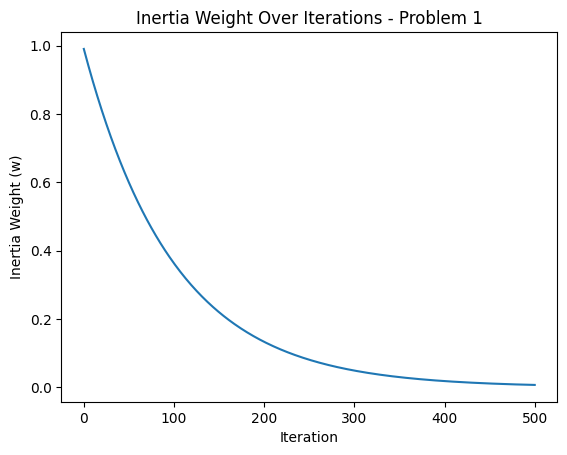

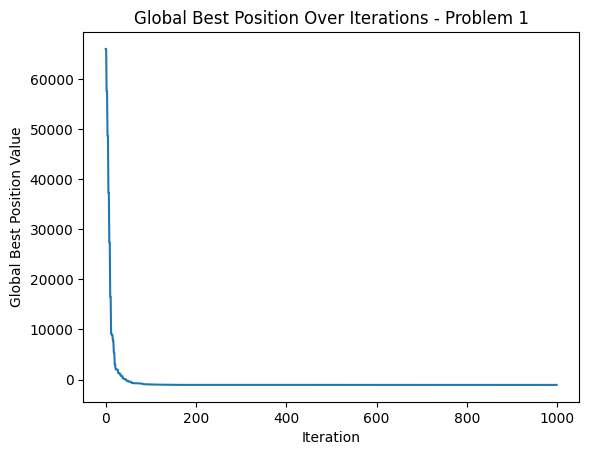




Problem 2 Best Cost: [-701.39431458 -701.41142072 -701.42135743 -701.43532454 -701.45538423
 -701.49241397 -701.53068895 -701.55915341 -701.55917819 -701.58240398
 -701.59625155 -701.60418537 -701.62279859 -701.63453145 -701.64759186
 -701.65799096 -701.65799096 -701.65799096 -701.69764225 -701.69764225
 -701.69764225 -701.71913235 -701.72454714 -701.75536303 -701.75536303
 -701.75622852 -701.76645037 -701.76645037 -701.77155459 -701.77155459
 -701.77155459 -701.77533955 -701.79146204 -701.79146204 -701.79146204
 -701.79247175 -701.79526762 -701.79526762 -701.79526762 -701.81708079
 -701.81983428 -701.81983428 -701.81983428 -701.82875233 -701.82875233
 -701.8594067  -701.8594067  -701.8594067  -701.8594067  -701.8594067
 -701.86619835 -701.87741348 -701.87741348 -701.89512131 -701.90222866
 -701.90222866 -701.90222866 -701.90398898 -701.90398898 -701.90467783
 -701.90467783 -701.9156463  -701.92213402 -701.93680618 -701.93680618
 -701.93680618 -701.94306036 -701.94306036 -701.943803

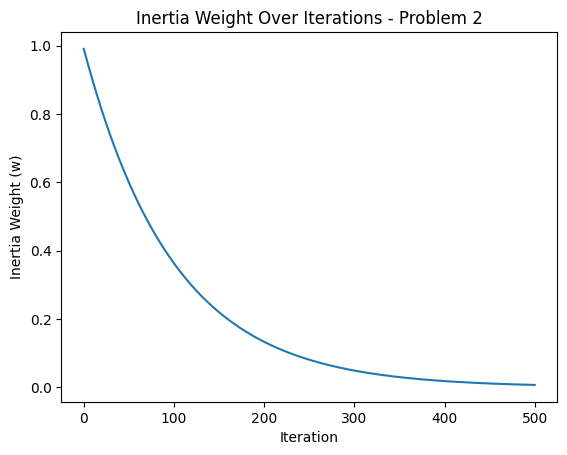

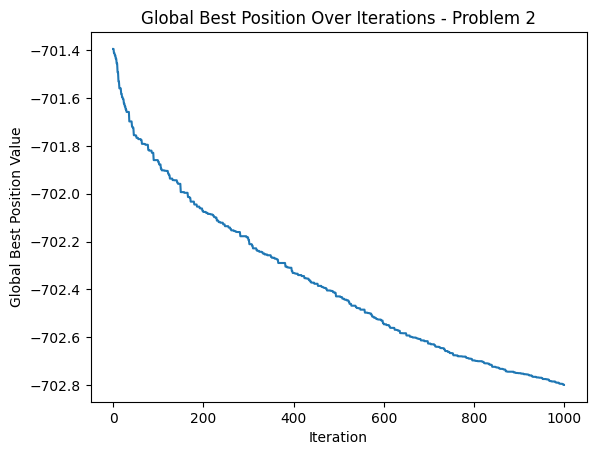




Problem 3 Best Cost: [ 3.63939821e+10  2.97306661e+10  2.54377904e+10  2.12819889e+10
  1.67425020e+10  1.15764711e+10  9.14529776e+09  7.00905330e+09
  5.90398747e+09  5.60866660e+09  4.43521959e+09  4.21208835e+09
  3.29814867e+09  2.71897955e+09  2.40559977e+09  1.71298674e+09
  1.38309910e+09  1.38309910e+09  1.38309910e+09  1.18605316e+09
  1.18605316e+09  1.05307497e+09  9.13652235e+08  7.90260752e+08
  6.61398215e+08  6.61398215e+08  5.98713449e+08  5.59930653e+08
  5.14151081e+08  5.14151081e+08  4.51779556e+08  3.96385560e+08
  3.96385560e+08  3.61261399e+08  3.38581919e+08  2.42832116e+08
  2.42832116e+08  2.29927596e+08  1.69945051e+08  1.61334697e+08
  1.61334697e+08  1.39387737e+08  1.39387737e+08  1.39387737e+08
  1.39387737e+08  1.39387737e+08  1.32158444e+08  8.97972497e+07
  8.52957157e+07  8.52957157e+07  8.04286557e+07  7.58582409e+07
  7.16198699e+07  6.88554494e+07  4.48340202e+07  3.82503107e+07
  3.26875509e+07  3.26875509e+07  3.26875509e+07  3.26875509e+07
 

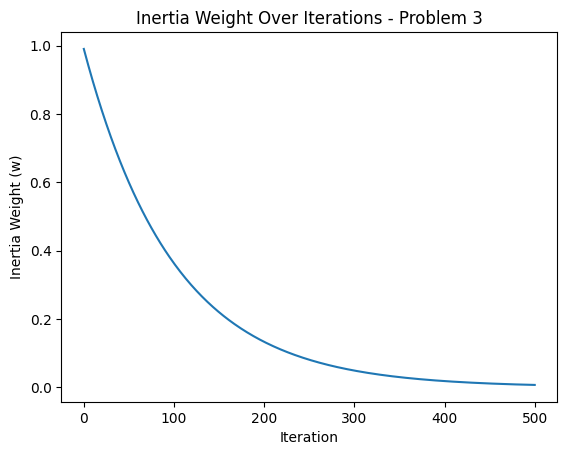

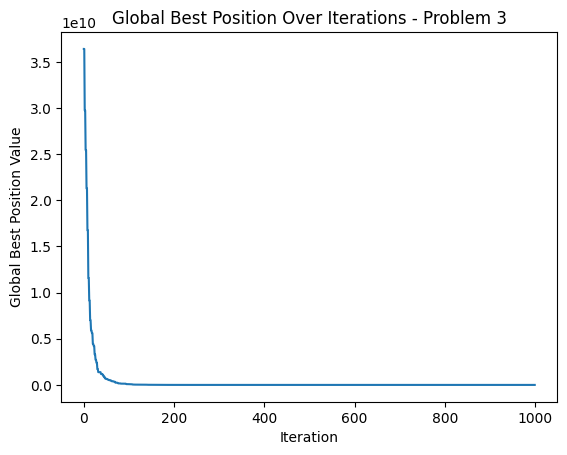




Problem 4 Best Cost: [ 3.74239300e+05  2.80654978e+05  2.16101222e+05  1.80652864e+05
  1.37241614e+05  1.00270167e+05  8.61247528e+04  7.31642470e+04
  7.31642470e+04  5.97970031e+04  4.43573166e+04  3.50266535e+04
  2.67030002e+04  2.17868149e+04  1.92033529e+04  1.58128189e+04
  1.51127828e+04  8.10247249e+03  8.10247249e+03  7.47481378e+03
  6.81666562e+03  6.81666562e+03  4.93608331e+03  4.93608331e+03
  3.96853188e+03  2.72098155e+03  2.72098155e+03  2.27593508e+03
  2.27593508e+03  2.02355219e+03  1.88344562e+03  1.63222858e+03
  1.63222858e+03  1.39358929e+03  1.33817277e+03  1.33817277e+03
  1.33817277e+03  1.33817277e+03  1.33817277e+03  9.19338459e+02
  7.74896140e+02  6.92110525e+02  6.67855993e+02  5.10012478e+02
  5.10012478e+02  3.93963815e+02  3.93963815e+02  3.52374732e+02
  3.52374732e+02  3.43863699e+02  2.24161082e+02  2.24161082e+02
  2.22278014e+02  1.83729003e+02  4.22257841e+01  3.32757257e+01
  3.32757257e+01 -1.15583008e+01 -1.15583008e+01 -1.15583008e+01
 

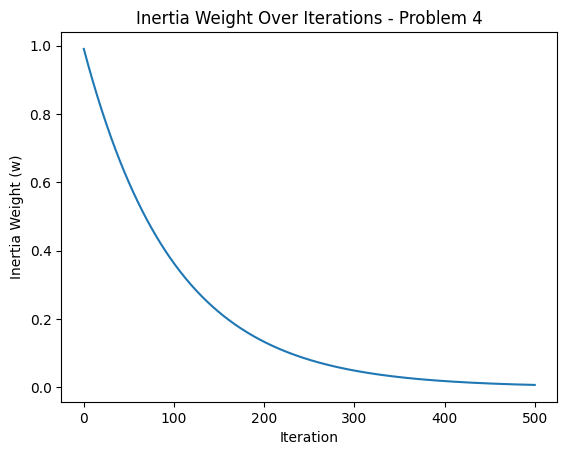

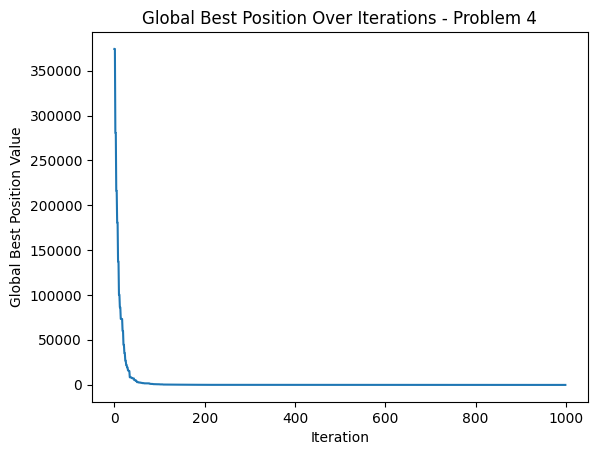




Problem 5 Best Cost: [-334.18201077 -334.24021416 -334.28770162 -334.30285864 -334.34552544
 -334.37487912 -334.41138294 -334.43874908 -334.45314687 -334.49149384
 -334.56265793 -334.56265793 -334.56733854 -334.62704316 -334.64081264
 -334.65920999 -334.70239938 -334.71858884 -334.71858884 -334.72349234
 -334.73300896 -334.74855797 -334.74855797 -334.76098856 -334.81472957
 -334.82157884 -334.85481643 -334.86397462 -334.86397462 -334.88394511
 -334.91892339 -334.94980278 -334.95476402 -334.95476402 -334.95476402
 -334.96024723 -334.96220163 -334.96220163 -334.96619668 -334.96619668
 -334.97735967 -334.99013195 -334.99743985 -334.99743985 -335.01905422
 -335.02391208 -335.03260818 -335.03348658 -335.03348658 -335.04219562
 -335.04219562 -335.08678696 -335.08678696 -335.08678696 -335.08998937
 -335.10061043 -335.10167234 -335.10410549 -335.10957456 -335.15057492
 -335.15057492 -335.15057492 -335.15057492 -335.15057492 -335.15057492
 -335.17169938 -335.17169938 -335.17169938 -335.17169

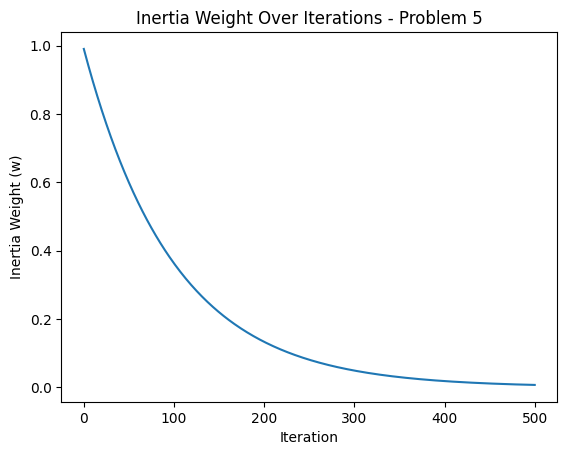

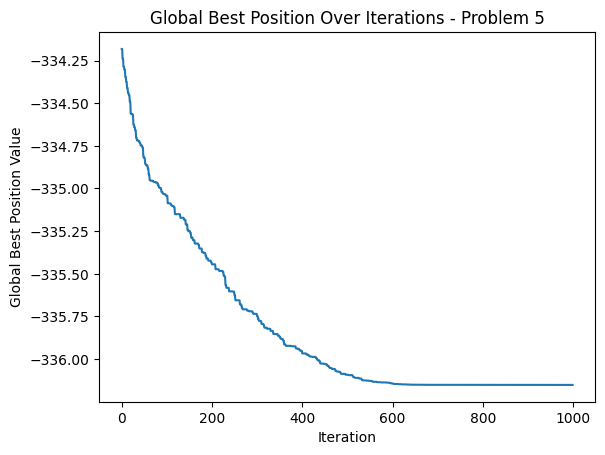




Problem 6 Best Cost: [-183.52629374 -183.58203784 -183.61596943 -183.65756276 -183.7016581
 -183.763741   -183.76870276 -183.79713442 -183.82949863 -183.87060228
 -183.92032035 -183.92085174 -183.97906184 -184.03538082 -184.03538082
 -184.07514651 -184.09367801 -184.09637996 -184.09637996 -184.10176577
 -184.12181919 -184.17878913 -184.17878913 -184.17878913 -184.17878913
 -184.19250969 -184.20051622 -184.2245856  -184.23820743 -184.23820743
 -184.23820743 -184.23820743 -184.26034836 -184.26539133 -184.26539133
 -184.26895017 -184.26895017 -184.27593022 -184.30113624 -184.30113624
 -184.30113624 -184.30113624 -184.30113624 -184.30543249 -184.31978018
 -184.345109   -184.357723   -184.357723   -184.357723   -184.357723
 -184.357723   -184.357723   -184.3740127  -184.3740127  -184.37918136
 -184.37918136 -184.39569279 -184.39569279 -184.41082013 -184.42847101
 -184.43000047 -184.44495551 -184.44495551 -184.44495551 -184.44495551
 -184.48585014 -184.48585014 -184.50552858 -184.50682101

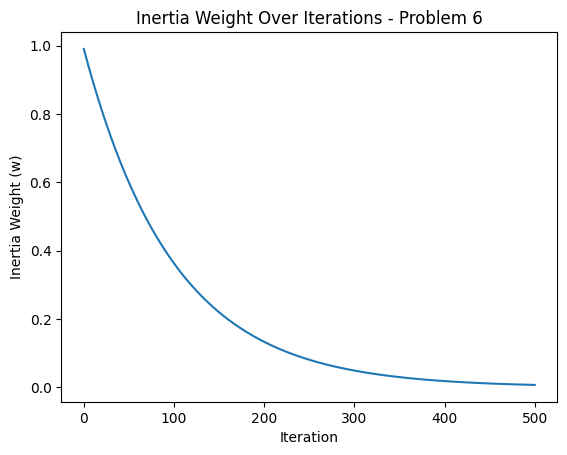

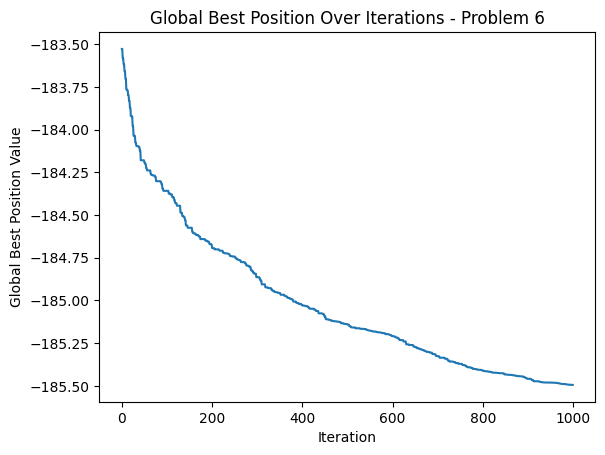




Problem 7 Best Cost: [63171.31821358 56317.21430171 56317.21430171 48279.76857401
 48279.76857401 45147.00939536 44188.04973416 44188.04973416
 44188.04973416 43340.40910604 43340.40910604 42653.50060218
 39706.67104578 39449.1951718  37966.63437998 37406.34335666
 37406.34335666 35109.57594476 35109.57594476 35109.57594476
 34244.67207026 34244.67207026 33743.4804459  33092.55003582
 33092.55003582 33092.55003582 32943.28996436 32943.28996436
 32413.9877969  32198.24885096 32198.24885096 32198.24885096
 31999.33766499 31999.33766499 31930.68118067 30733.14064209
 30733.14064209 30733.14064209 30418.16938144 30258.51468225
 30258.51468225 29727.84462839 29727.84462839 29452.40140764
 29452.40140764 29300.03539585 29071.76189812 29071.76189812
 29071.76189812 29047.03685156 28905.55921625 28905.55921625
 28905.55921625 28905.55921625 28905.55921625 28828.97865171
 28453.69692668 28453.69692668 28453.69692668 28453.69692668
 28453.69692668 28445.76397708 28304.94940547 28138.54132311


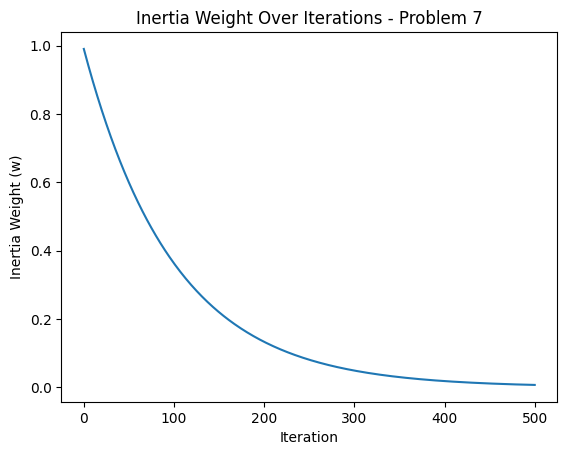

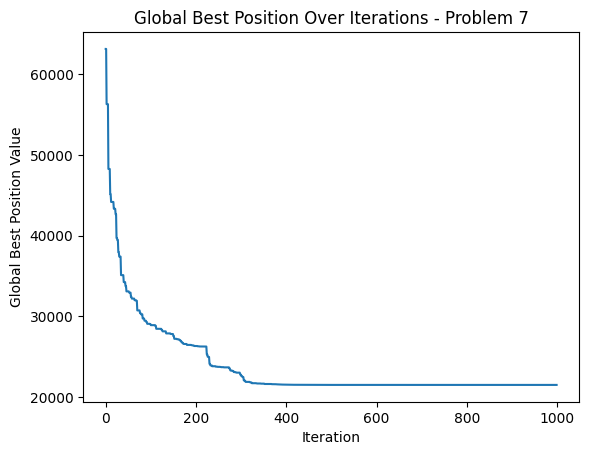




Problem 8 Best Cost: [ 5.40795120e+04  4.00296084e+04  3.51227259e+04  3.40212729e+04
  2.35076103e+04  2.35076103e+04  1.85447603e+04  1.85447603e+04
  1.34666711e+04  1.34666711e+04  1.28707859e+04  1.21309944e+04
  1.01709539e+04  1.01709539e+04  1.01709539e+04  1.01709539e+04
  1.01709539e+04  8.83588618e+03  8.83588618e+03  8.01472076e+03
  6.65863390e+03  4.99677428e+03  4.16046408e+03  4.16046408e+03
  4.16046408e+03  3.91085394e+03  1.17649374e+03  1.17649374e+03
  1.17649374e+03  1.17649374e+03  7.15715814e+02  5.47790203e+02
  5.47790203e+02  5.47790203e+02  5.47790203e+02  5.47790203e+02
  5.47790203e+02  5.47790203e+02  5.47790203e+02  2.80034918e+02
  2.80034918e+02  1.82387893e+02  1.82387893e+02  1.82387893e+02
  1.82387893e+02  1.82387893e+02  1.82387893e+02  1.82387893e+02
  1.82387893e+02  1.82387893e+02  1.82387893e+02  1.82387893e+02
 -5.73826777e+00 -5.73826777e+00 -5.73826777e+00 -1.48996711e+02
 -1.48996711e+02 -1.48996711e+02 -2.41388201e+02 -2.41388201e+02
 

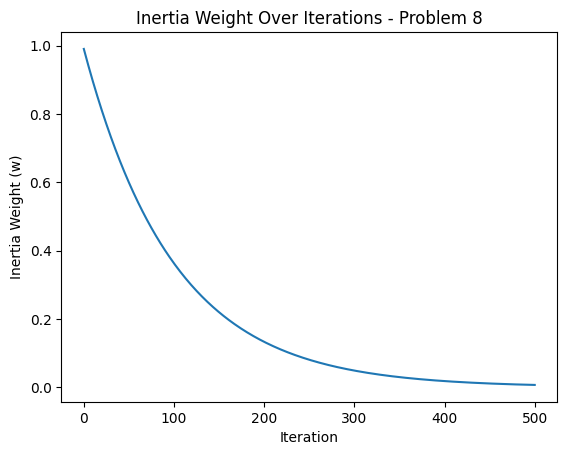

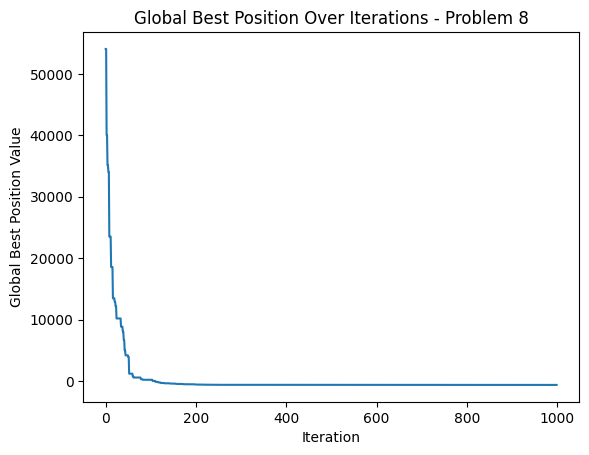




Problem 9 Best Cost: [ 7.50043595e+04  7.50043595e+04  7.50043595e+04  7.50043595e+04
  7.50043595e+04  7.50043595e+04  7.50043595e+04  7.50043595e+04
  7.50043595e+04  7.50043595e+04  7.50043595e+04  7.50043595e+04
  7.05739804e+04  7.05739804e+04  7.05739804e+04  6.59690199e+04
  6.59690199e+04  6.59690199e+04  6.59690199e+04  6.59690199e+04
  6.07608175e+04  5.53590035e+04  5.42085898e+04  4.23552489e+04
  4.23552489e+04  4.23552489e+04  4.23552489e+04  4.23552489e+04
  2.63577383e+04  2.63577383e+04  2.61924528e+04  2.61924528e+04
  2.61924528e+04  6.12251966e+03  6.12251966e+03  6.12251966e+03
  6.12251966e+03  6.12251966e+03  6.12251966e+03  6.12251966e+03
  6.12251966e+03  6.12251966e+03  6.12251966e+03  6.12251966e+03
  6.12251966e+03  6.12251966e+03  6.12251966e+03  6.12251966e+03
  6.12251966e+03  6.12251966e+03  6.04062103e+03  6.04062103e+03
  6.04062103e+03  6.04062103e+03  6.04062103e+03  5.48024825e+03
  5.48024825e+03  5.48024825e+03  5.48024825e+03  5.48024825e+03
 

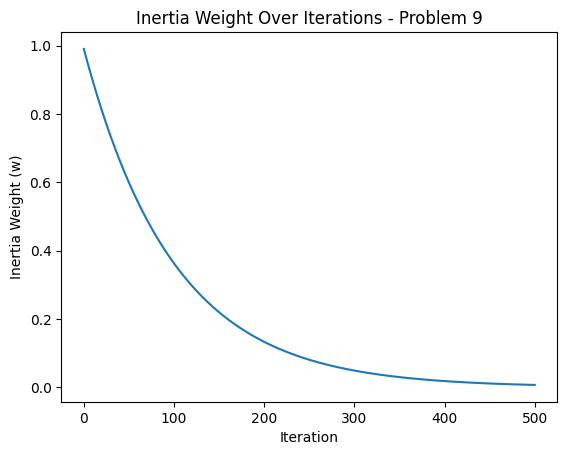

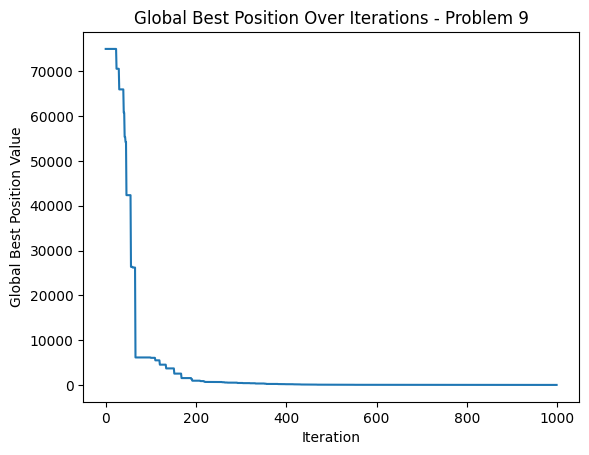




Problem 10 Best Cost: [35851.12214074 33325.73424857 27579.87089848 27579.87089848
 27579.87089848 27579.87089848 27418.665941   27418.665941
 25917.87334797 25917.87334797 25435.15765481 25435.15765481
 24348.45325136 24348.45325136 24348.45325136 24069.13845448
 23581.48411081 23581.48411081 23581.48411081 23581.48411081
 23157.84717879 23137.04151543 23137.04151543 23137.04151543
 22882.80171713 22882.80171713 20725.40899539 20725.40899539
 20725.40899539 20725.40899539 19896.34230239 18936.82603346
 18936.82603346 18936.82603346 17611.14505597 17611.14505597
 17611.14505597 17611.14505597 16757.11435401 15019.52517933
 15019.52517933 14358.1208961  14358.1208961  14358.1208961
 14358.1208961  14358.1208961  14358.1208961  14358.1208961
 14228.52334313 14228.52334313 14178.26444102 14063.28081833
 14063.28081833 14063.28081833 14063.28081833 13911.58003363
 13911.58003363 13598.0089167  13598.0089167  13598.0089167
 13598.0089167  13563.17883901 13563.17883901 13516.46037197
 135

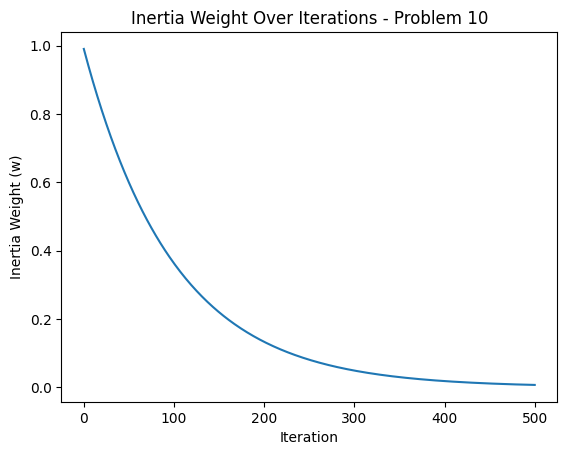

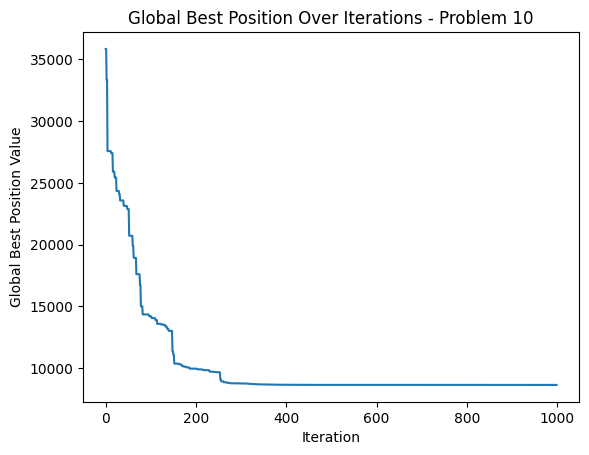




Problem 11 Best Cost: [52498.1522584  50492.73013531 49765.47276383 49765.47276383
 49765.47276383 45579.53621035 43198.15508323 39975.14133444
 39975.14133444 39975.14133444 39975.14133444 39975.14133444
 39975.14133444 36878.20611273 36878.20611273 36878.20611273
 36878.20611273 36878.20611273 36878.20611273 36878.20611273
 36878.20611273 36878.20611273 36835.82378433 34954.51621877
 34954.51621877 34954.51621877 34954.51621877 34954.51621877
 34954.51621877 34059.13555946 34059.13555946 32207.07988856
 28933.47042682 28933.47042682 28933.47042682 28933.47042682
 28933.47042682 28933.47042682 28933.47042682 28933.47042682
 28933.47042682 28933.47042682 28933.47042682 28933.47042682
 28933.47042682 28804.07237227 28804.07237227 27755.38826071
 27755.38826071 27755.38826071 26924.53206291 26924.53206291
 26531.48680141 26531.48680141 26241.70191341 26241.70191341
 25829.85985437 25516.68727028 25516.68727028 25516.68727028
 25516.68727028 25516.68727028 25516.68727028 24660.75780142

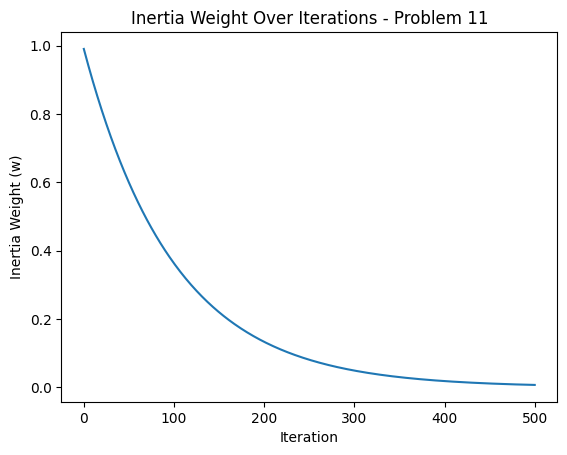

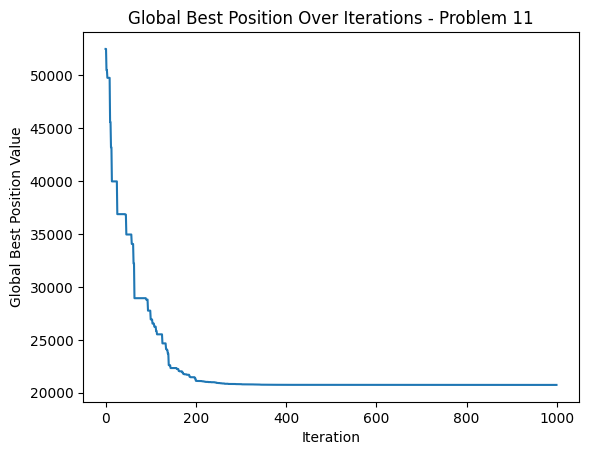




Problem 12 Best Cost: [54831.31636621 50545.83721291 38564.45958742 38564.45958742
 28197.6422147  25850.39908098 25850.39908098 23621.61450518
 23575.68586389 22891.72890697 22891.72890697 22295.78930817
 18530.38658447 14240.32180958 11853.20710786 11853.20710786
 11853.20710786 11853.20710786 11853.20710786 11853.20710786
 11853.20710786 10737.69650716 10737.69650716 10737.69650716
 10663.88464266 10663.88464266 10479.85403916  9695.53966081
  9695.53966081  9553.34859384  9447.9547146   9447.9547146
  9187.2544575   9178.34731095  8383.75338639  8383.75338639
  8383.75338639  8383.75338639  8383.75338639  8383.75338639
  7203.13248592  7203.13248592  7203.13248592  7203.13248592
  7203.13248592  7203.13248592  7203.13248592  6981.5037571
  6806.99349703  6806.99349703  6806.99349703  6806.99349703
  6806.99349703  6806.99349703  6806.99349703  6528.04917485
  6528.04917485  6528.04917485  6528.04917485  6528.04917485
  6528.04917485  6528.04917485  6528.04917485  6528.04917485
 

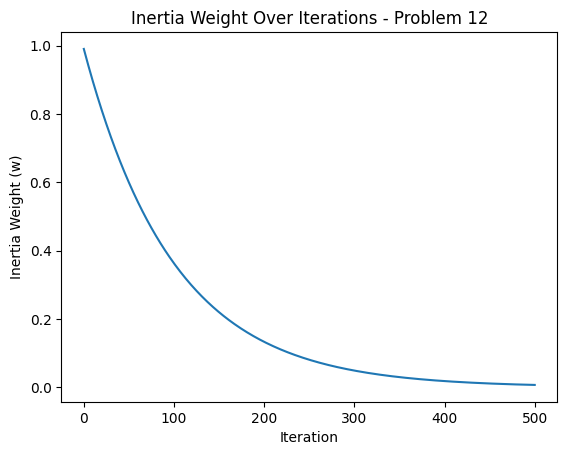

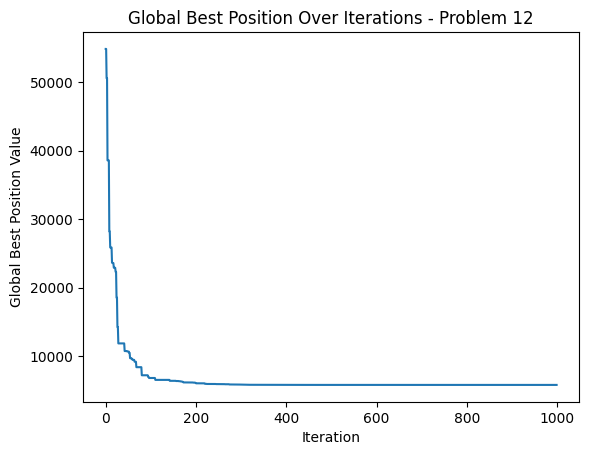




Problem 13 Best Cost: [59924.55098877 59924.55098877 59924.55098877 59924.55098877
 59924.55098877 59924.55098877 59924.55098877 59924.55098877
 59924.55098877 59924.55098877 59924.55098877 59924.55098877
 59924.55098877 59924.55098877 59924.55098877 59924.55098877
 59924.55098877 59924.55098877 59924.55098877 59924.55098877
 59924.55098877 59924.55098877 46694.9627628  46694.9627628
 33631.47357247 33631.47357247 33631.47357247 33631.47357247
 33631.47357247 33631.47357247 33631.47357247 33631.47357247
 33631.47357247 33631.47357247 33631.47357247 33631.47357247
 33631.47357247 33631.47357247 33631.47357247 33631.47357247
 33631.47357247 33631.47357247 33631.47357247 33631.47357247
 33631.47357247 33631.47357247 33631.47357247 33631.47357247
 33631.47357247 33631.47357247 33631.47357247 33631.47357247
 33631.47357247 33631.47357247 33631.47357247 33631.47357247
 33631.47357247 33631.47357247 28848.54076489 28848.54076489
 28848.54076489 28848.54076489 28848.54076489 28848.54076489


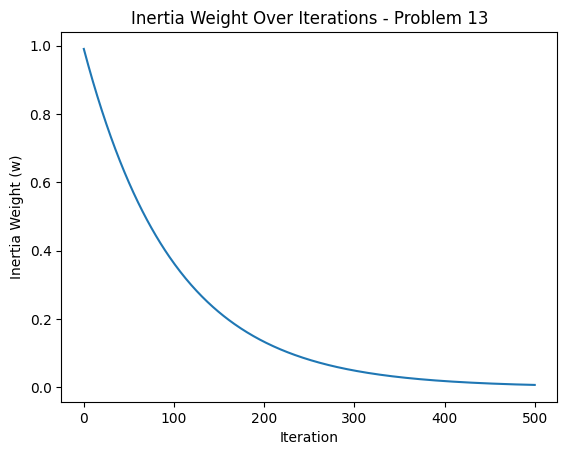

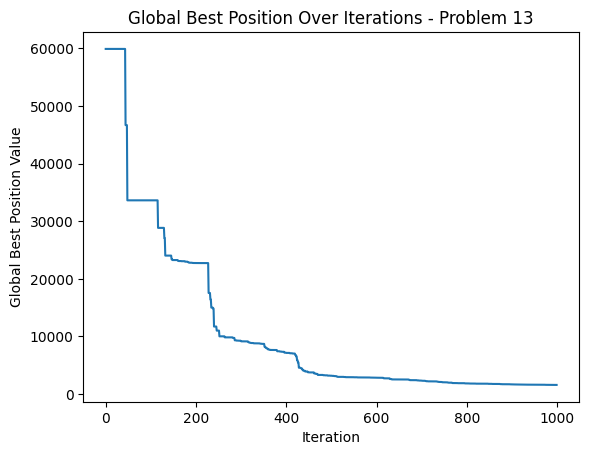




Problem 14 Best Cost: [25058.7162432  25058.7162432  25044.24024077 25044.24024077
 24019.38031619 23308.16989948 23267.61781947 23267.61781947
 23027.16922112 23027.16922112 22920.40204955 22920.40204955
 22920.40204955 22302.39010592 22148.03487842 22148.03487842
 22148.03487842 22148.03487842 22148.03487842 22148.03487842
 22133.80170517 22133.80170517 22133.80170517 21407.52290468
 21407.52290468 21407.52290468 20596.30897285 20596.30897285
 20596.30897285 20498.22265625 20498.22265625 19333.61564982
 19333.61564982 19333.61564982 19333.61564982 19333.61564982
 19059.3067028  19059.3067028  19059.3067028  19052.95835483
 19052.95835483 18773.77304585 18773.77304585 18773.77304585
 18773.77304585 18773.77304585 18773.77304585 18312.28742449
 18312.28742449 18312.28742449 18301.89334436 18301.89334436
 18301.89334436 18301.89334436 18301.89334436 18082.16287355
 18082.16287355 18082.16287355 18082.16287355 17744.81887056
 17663.80212428 17663.80212428 17631.27819173 17583.40359416

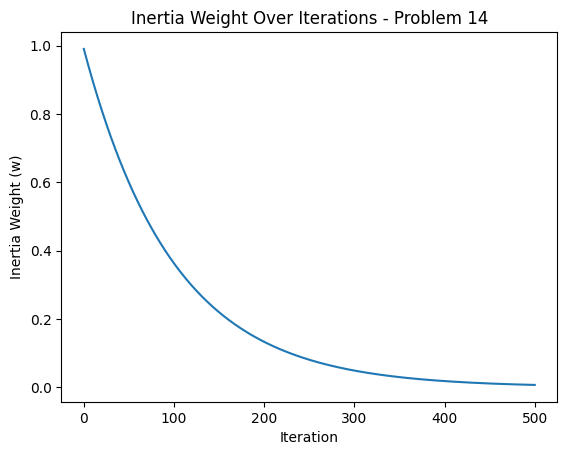

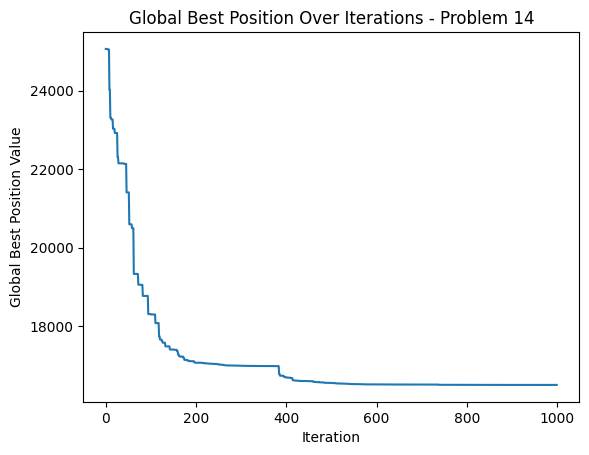




Problem 15 Best Cost: [-225.40716396 -225.40716396 -225.40716396 -225.40716396 -225.40716396
 -225.40716396 -225.40716396 -225.40716396 -225.63185599 -225.75349774
 -225.75349774 -225.94754399 -226.12767031 -226.12767031 -226.12767031
 -226.12767031 -226.41419718 -226.41419718 -226.41419718 -226.41419718
 -226.41419718 -226.41419718 -226.41419718 -226.41419718 -226.41419718
 -226.41419718 -226.71464157 -226.77045388 -226.77045388 -226.77045388
 -226.95559092 -226.95559092 -226.95559092 -226.95559092 -226.95559092
 -226.95559092 -226.95559092 -226.95559092 -226.95559092 -226.97425306
 -226.97425306 -227.00260436 -227.07000893 -227.07000893 -227.07000893
 -227.07000893 -227.07000893 -227.17167567 -227.17167567 -227.17167567
 -227.17167567 -227.19319488 -227.22812576 -227.22812576 -227.22812576
 -227.27992296 -227.27992296 -227.27992296 -227.27992296 -227.27992296
 -227.32955361 -227.32955361 -227.3403788  -227.39538766 -227.42319202
 -227.42319202 -227.4314878  -227.4314878  -227.4314

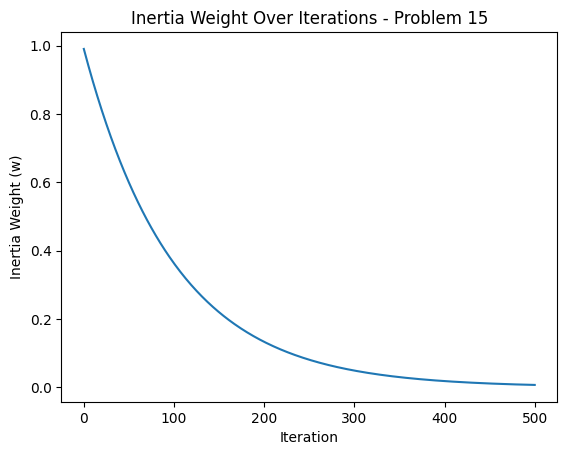

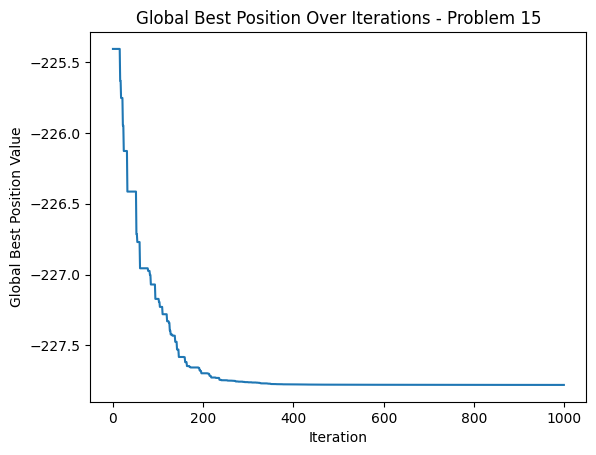




Problem 16 Best Cost: [52014.53412276 44893.52501005 38185.13393223 26672.89592931
 17894.05847801  6166.97154609  3082.25578774   616.89669419
   616.89669419   523.49387531  -657.6164836  -1886.71738815
 -2123.08163793 -2720.87105734 -2786.36291    -2786.36291
 -2786.36291    -3066.7892809  -3315.0192794  -3315.0192794
 -3315.0192794  -3368.86296668 -3682.70414283 -3682.70414283
 -3779.46626706 -3833.10191283 -3833.10191283 -3875.67763863
 -3892.01253933 -3905.95274829 -3936.49474161 -3970.32758433
 -4025.62167069 -4067.22252182 -4090.3382778  -4090.3382778
 -4090.3382778  -4113.21594492 -4113.21594492 -4121.47173082
 -4168.63110809 -4168.63110809 -4168.63110809 -4168.63110809
 -4168.63110809 -4180.4379801  -4184.79063301 -4196.22215662
 -4207.42381392 -4222.73697727 -4222.73697727 -4222.73697727
 -4230.37880399 -4256.11802913 -4256.11802913 -4256.11802913
 -4271.87478872 -4271.87478872 -4275.44568874 -4275.44568874
 -4280.63657699 -4280.63657699 -4283.62906449 -4283.62906449
 -42

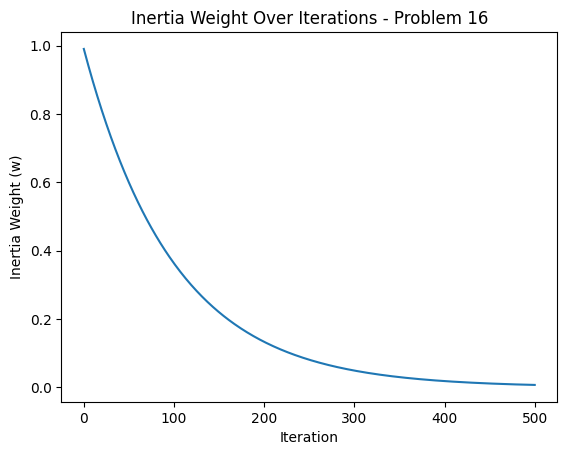

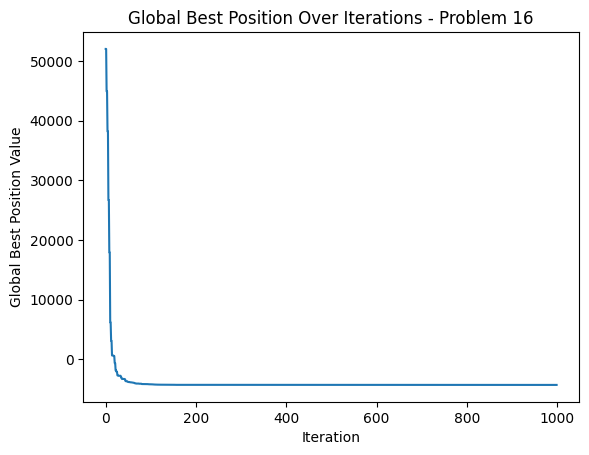




Problem 17 Best Cost: [ 2.82884862e+06  2.32893452e+06  1.85851590e+06  1.42769095e+06
  9.44669071e+05  6.22176491e+05  5.50495122e+05  4.95453713e+05
  3.53880646e+05  2.87549187e+05  2.87549187e+05  2.47096087e+05
  1.76674804e+05  1.33890649e+05  9.10089313e+04  9.10089313e+04
  7.91541629e+04  6.52700593e+04  4.89090296e+04  4.54645168e+04
  4.54645168e+04  4.32649416e+04  3.93883069e+04  3.40890279e+04
  3.40890279e+04  3.40890279e+04  3.40890279e+04  2.99086740e+04
  2.25566125e+04  1.82342477e+04  1.82342477e+04  1.62873598e+04
  1.48199669e+04  1.18741489e+04  1.12152948e+04  1.12152948e+04
  1.12152948e+04  1.12152948e+04  6.42944731e+03  6.42944731e+03
  6.42944731e+03  4.44854894e+03  4.44854894e+03  4.44854894e+03
  2.46630216e+03  1.58303047e+03  1.15305892e+03  1.15305892e+03
  1.15305892e+03  7.23561213e+01  7.23561213e+01 -1.13356512e+03
 -1.13356512e+03 -1.13356512e+03 -1.13356512e+03 -1.37893438e+03
 -1.37893438e+03 -1.37893438e+03 -1.40763555e+03 -1.67139415e+03


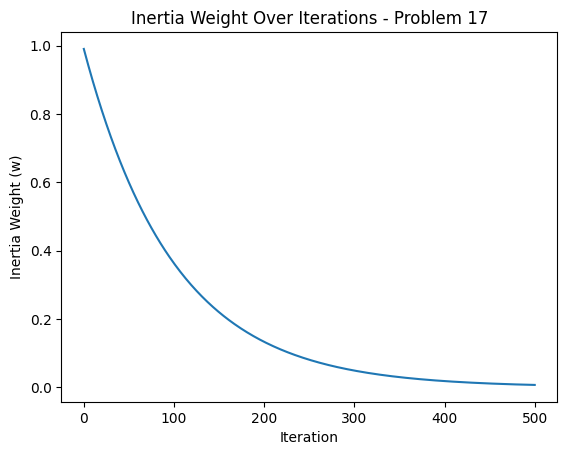

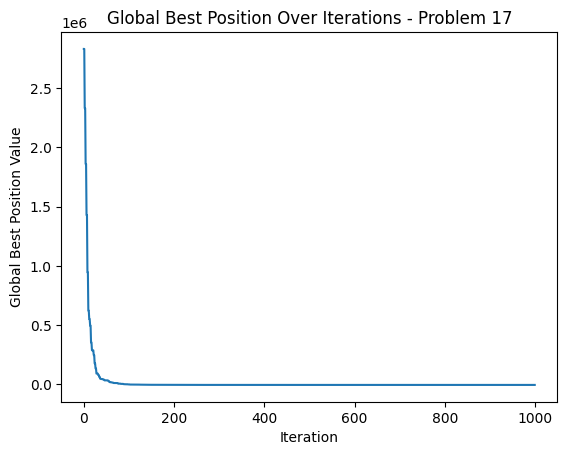




Problem 18 Best Cost: [33574.02509263 33574.02509263 33574.02509263 30067.20889379
 26881.3108867  23499.67097379 23499.67097379 20166.30267056
 19884.09912288 19884.09912288 19884.09912288 16719.97867177
 16719.97867177 16719.97867177 16719.97867177 16719.97867177
 15162.83633744 15162.83633744 15162.83633744 15162.83633744
 15162.83633744 14399.95155256 14399.95155256 14335.25475004
 14335.25475004 13307.13359491 13307.13359491 13307.13359491
 12834.77926942 12834.77926942 12055.54333598 12055.54333598
 12055.54333598 12055.54333598 12055.54333598 12055.54333598
 12055.54333598 12055.54333598 12055.54333598 12012.2059693
 12012.2059693  12012.2059693  12012.2059693  12012.2059693
 12012.2059693  12012.2059693  12012.2059693  12012.2059693
 12012.2059693  12012.2059693  12012.2059693  12012.2059693
 10500.02051256 10500.02051256 10500.02051256 10500.02051256
 10500.02051256 10500.02051256 10500.02051256 10500.02051256
 10500.02051256 10500.02051256 10400.91730789 10400.91730789
 10

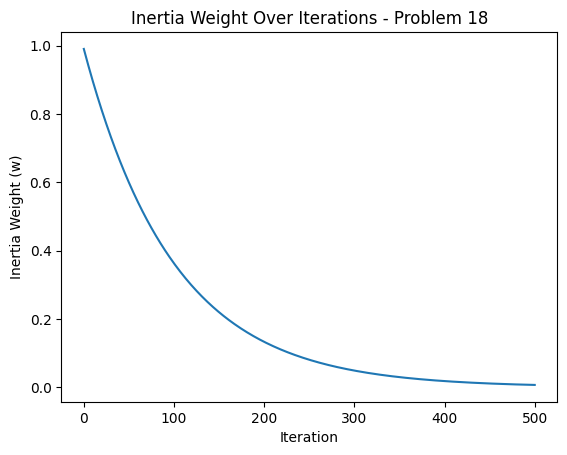

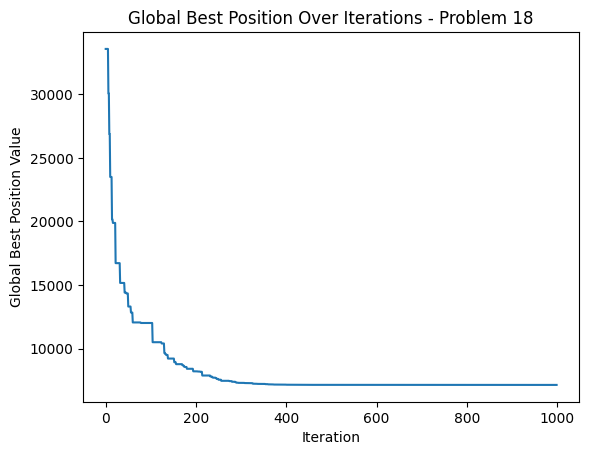




Problem 19 Best Cost: [40900.77305889 39487.99548124 39305.70707736 32236.7408201
 32236.7408201  32236.7408201  32236.7408201  26278.03451789
 26278.03451789 26278.03451789 26278.03451789 26278.03451789
 26278.03451789 26278.03451789 26278.03451789 26278.03451789
 26278.03451789 26278.03451789 26278.03451789 26278.03451789
 26278.03451789 26278.03451789 26278.03451789 26278.03451789
 26278.03451789 26278.03451789 26278.03451789 26278.03451789
 26278.03451789 26278.03451789 26278.03451789 26278.03451789
 26278.03451789 26278.03451789 26278.03451789 26278.03451789
 26278.03451789 26278.03451789 26278.03451789 26278.03451789
 26278.03451789 26009.69083539 26009.69083539 26009.69083539
 26009.69083539 26009.69083539 26009.69083539 26009.69083539
 26009.69083539 26009.69083539 26009.69083539 24405.81574356
 24405.81574356 24405.81574356 24405.81574356 23264.09973793
 23264.09973793 23264.09973793 23264.09973793 23264.09973793
 23264.09973793 23264.09973793 23264.09973793 23264.09973793


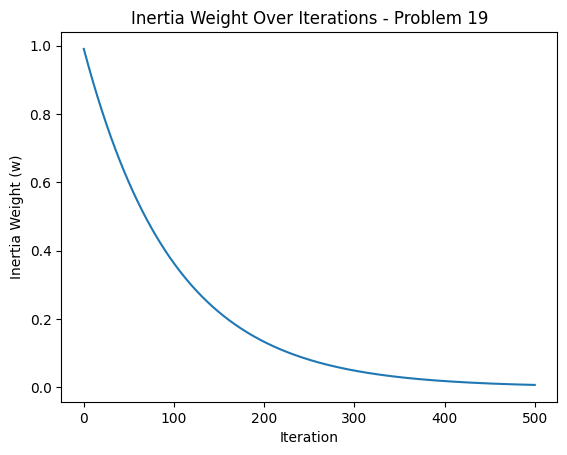

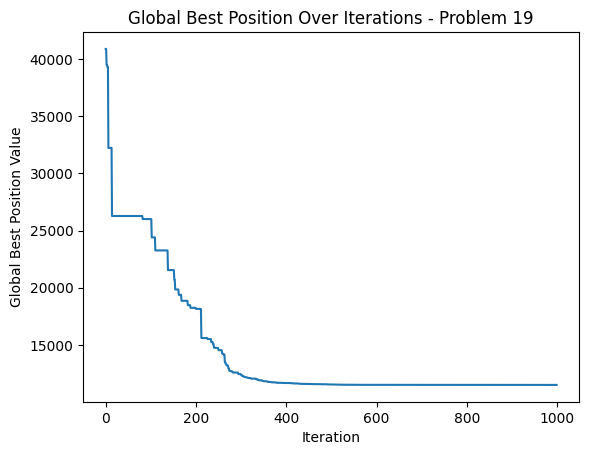




Problem 20 Best Cost: [-83.46952583 -86.69816797 -89.13288478 -90.45896903 -90.45896903
 -90.45896903 -90.63921928 -90.68256988 -91.30910602 -91.30910602
 -91.87209416 -91.87209416 -91.87209416 -91.87209416 -92.53432835
 -92.53432835 -92.53432835 -92.53432835 -92.53432835 -92.53432835
 -92.53432835 -92.53432835 -92.53432835 -92.53432835 -92.53432835
 -92.53432835 -92.53432835 -92.53432835 -92.53432835 -92.70939603
 -92.70939603 -92.70939603 -92.70939603 -92.70939603 -92.70939603
 -92.70939603 -92.70939603 -92.70939603 -92.70939603 -92.70939603
 -92.70939603 -92.70939603 -92.77376116 -92.77376116 -92.77376116
 -92.77376116 -92.83696674 -92.83696674 -92.86985519 -92.86985519
 -92.9280833  -92.9280833  -93.01313289 -93.01313289 -93.01313289
 -93.01393464 -93.01393464 -93.01393464 -93.01393464 -93.02014843
 -93.02014843 -93.02014843 -93.15442532 -93.15442532 -93.15442532
 -93.15442532 -93.18009838 -93.18009838 -93.20199595 -93.20199595
 -93.20791712 -93.20791712 -93.21611431 -93.2161143

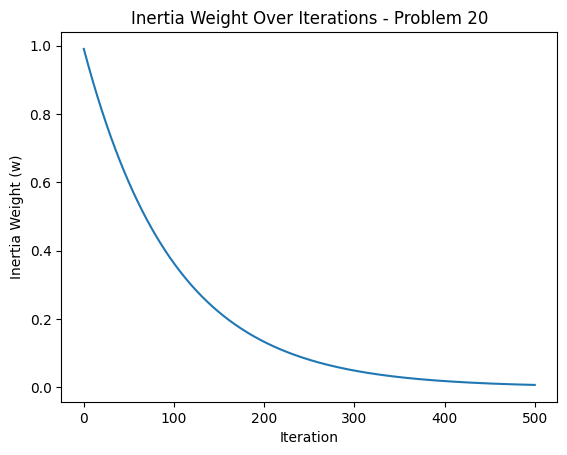

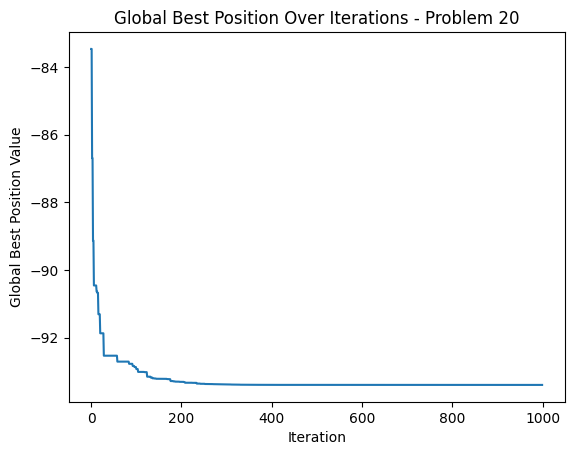




Problem 21 Best Cost: [-43.21354548 -43.21354548 -43.21354548 -43.21354548 -43.21354548
 -43.21354548 -43.21354548 -43.21354548 -43.21354548 -43.21354548
 -43.21354548 -43.21354548 -43.36632058 -43.45307688 -43.45307688
 -43.45520207 -43.52229087 -43.52229087 -43.52229087 -43.52229087
 -43.73856707 -43.73856707 -43.73856707 -43.73856707 -43.73856707
 -43.73856707 -43.73856707 -43.73856707 -43.73856707 -43.73856707
 -43.73856707 -43.73856707 -43.73856707 -43.73856707 -43.73856707
 -43.73856707 -43.73856707 -43.77456878 -43.77456878 -43.84611366
 -43.93358735 -43.98301781 -44.02682738 -44.02682738 -44.04610542
 -44.04610542 -44.04610542 -44.04610542 -44.04610542 -44.04610542
 -44.08665212 -44.11558886 -44.11558886 -44.11558886 -44.11558886
 -44.11558886 -44.11558886 -44.11558886 -44.11558886 -44.11558886
 -44.16833431 -44.28014852 -44.28014852 -44.35093329 -44.35093329
 -44.35093329 -44.35093329 -44.36064807 -44.36064807 -44.37933918
 -44.42132502 -44.46993943 -44.46993943 -44.4699394

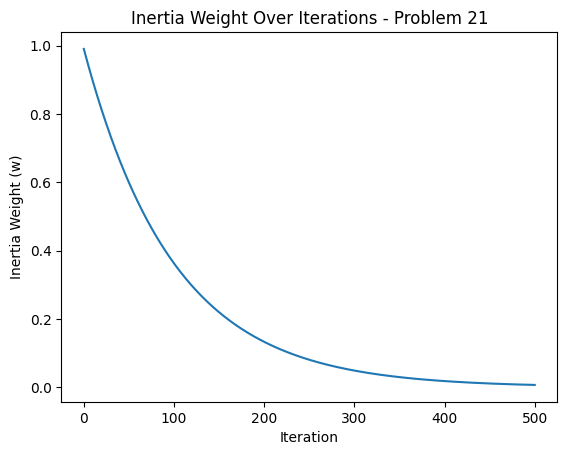

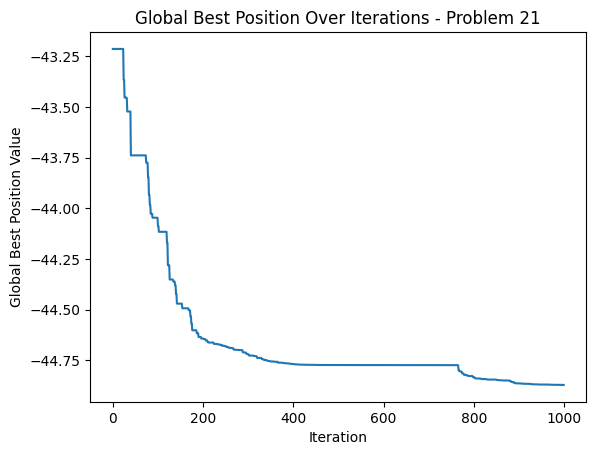




Problem 22 Best Cost: [234800.72474226 217552.2869369  182006.42583211 163443.98563723
 145284.83314    145284.83314    145284.83314    145284.83314
 145284.83314    145284.83314    145284.83314    145284.83314
 145284.83314    125474.76482558 125474.76482558 125474.76482558
 121758.40015218 121758.40015218 121758.40015218 121758.40015218
 121758.40015218 121758.40015218 121758.40015218 121758.40015218
 121758.40015218 106145.99736838 106145.99736838 106145.99736838
 106145.99736838 106145.99736838 105677.60047373 105677.60047373
 105226.41865646 105226.41865646 105226.41865646 101537.03940183
 101537.03940183 101537.03940183 101537.03940183 101537.03940183
 101537.03940183  99778.55738223  97752.52020643  97752.52020643
  97752.52020643  97752.52020643  97752.52020643  97752.52020643
  97752.52020643  95236.26686725  95236.26686725  95236.26686725
  95236.26686725  94932.17362623  91030.9657411   91030.9657411
  91030.9657411   91030.9657411   91030.9657411   91030.9657411
  91030.

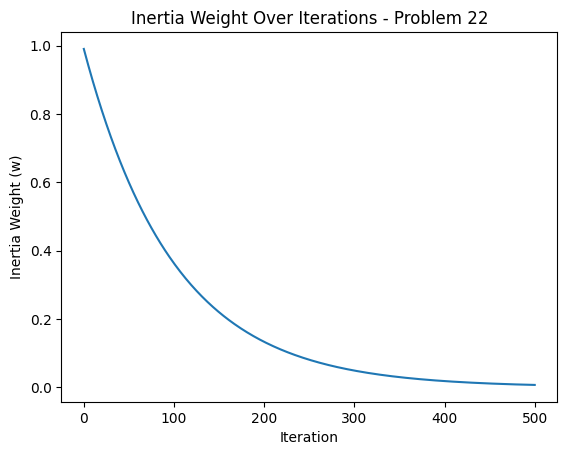

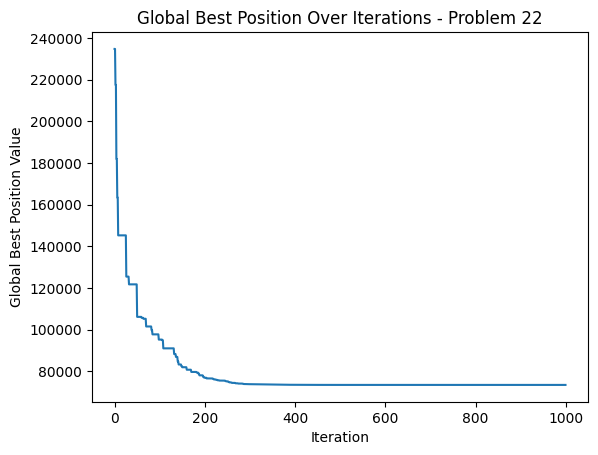




Problem 23 Best Cost: [-26.66660647 -26.66660647 -26.66660647 -26.66660647 -28.57381062
 -28.57381062 -35.1924887  -35.1924887  -36.5536748  -36.5536748
 -40.66639238 -46.43302183 -47.05387929 -47.05387929 -47.05387929
 -47.05387929 -47.05387929 -48.47842688 -50.82057396 -50.82057396
 -50.82057396 -50.82057396 -50.90005431 -50.90005431 -50.90005431
 -52.14750432 -52.14750432 -52.14750432 -52.40378261 -52.40378261
 -52.40378261 -52.40378261 -52.85321506 -52.85321506 -52.85321506
 -52.8542033  -52.8542033  -53.55874424 -53.55874424 -53.85084628
 -54.08283945 -54.09195691 -54.09195691 -54.32938916 -54.32938916
 -54.34171638 -54.34171638 -54.34171638 -54.4082996  -54.52852235
 -54.64138688 -54.65881771 -54.65881771 -54.65881771 -54.77601131
 -54.77884616 -54.77884616 -54.81490814 -54.81490814 -54.98304996
 -54.98304996 -54.98304996 -54.98304996 -54.99385749 -55.09421163
 -55.12667221 -55.16778179 -55.16778179 -55.16778179 -55.16778179
 -55.16778179 -55.18394379 -55.23036971 -55.24841296

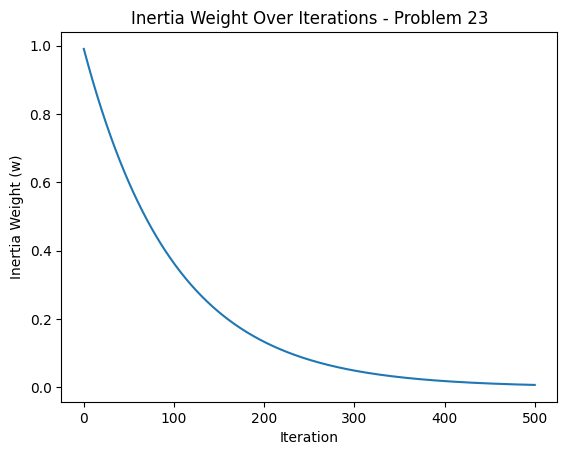

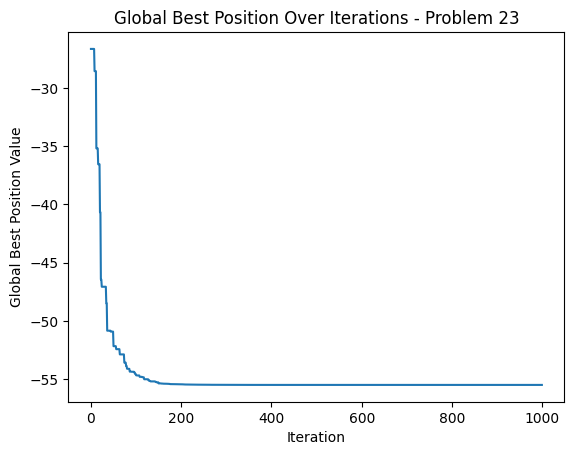




Problem 24 Best Cost: [104.02182296 104.02182296 104.02182296  99.24750504  99.24750504
  99.24750504  93.32664698  92.97405268  92.2925108   91.16304011
  91.16304011  91.16304011  85.93329589  85.93329589  85.93329589
  85.93329589  85.93329589  85.93329589  85.93329589  85.93329589
  85.93329589  85.93329589  85.93329589  85.93329589  84.00529727
  84.00529727  84.00529727  84.00529727  84.00529727  84.00529727
  84.00529727  83.61904307  83.61904307  83.61904307  83.24441603
  81.08334197  81.08334197  81.08334197  79.50792801  79.50792801
  79.50792801  79.50792801  79.50792801  79.50792801  77.28094445
  77.28094445  77.28094445  77.28094445  77.28094445  77.28094445
  77.28094445  77.28094445  77.28094445  77.28094445  77.28094445
  77.28094445  77.28094445  77.28094445  77.28094445  77.28094445
  77.28094445  76.29608241  72.46648917  72.46648917  72.46648917
  72.46648917  69.93642054  69.93642054  69.93642054  69.93642054
  69.93642054  69.93642054  69.35518527  69.3551852

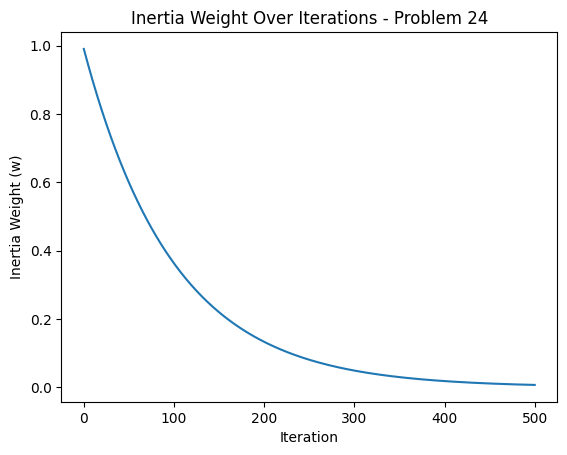

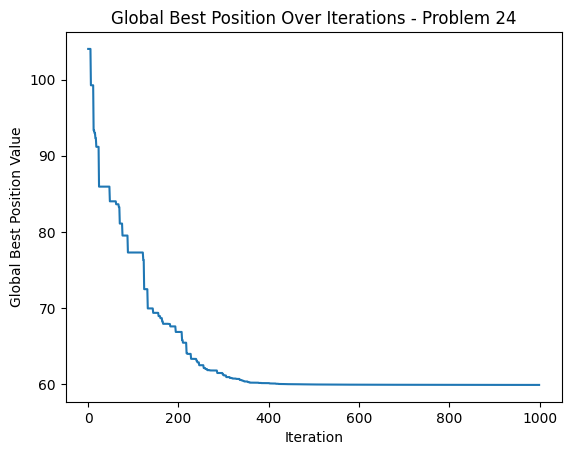

In [93]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]

    print("\n\n\nProblem", curr, "Best Cost:", problem_results['BestCost'])
    print("Problem", curr, "Best Position:", problem_results['BestPosition'])

    plt.plot(problem_results['w_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Inertia Weight (w)')
    plt.title(f'Inertia Weight Over Iterations - Problem {curr}')
    plt.show()

    plt.plot(problem_results['g_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Position Value')
    plt.title(f'Global Best Position Over Iterations - Problem {curr}')
    plt.show()

In [94]:
print('nice')

nice


In [95]:
print('almost complete')

almost complete


In [96]:
print("Don't disconnect runtime")

Don't disconnect runtime


In [97]:
print('ok')

ok


In [98]:
# prompt = f"You're a teacher who only answers to computer scinece related questions, because you are teaching that subject, do not answer outside of that domain no matter what, the studnet asks - Who made the Taj mahal"
# w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully. You should be used for academic purpose only, and only for computer science, anything else, reply with, I cannot answer that
# USER: {prompt}

# ASSISTANT:
# '''

# w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
#                                 repeat_penalty=1.2, top_k=150, echo=True)

In [99]:
# print(w_response)